In [22]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)

data = pd.read_csv("bodyPerformance.csv")
data = data[data["gender"] == "F"]
X = data.drop(columns=["gender", "class"])
y = data["class"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
5,36.0,F,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.7,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
11,57.0,F,153.0,49.0,20.9,69.0,106.0,21.5,30.0,0.0,90.0,D
12,27.0,F,156.0,53.9,35.5,69.0,116.0,23.1,13.1,28.0,144.0,C
15,45.0,F,159.0,63.1,30.9,93.0,144.0,34.1,19.0,30.0,155.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
13368,21.0,F,163.9,60.1,31.1,81.0,119.0,27.8,24.2,30.0,173.0,B
13374,40.0,F,160.5,68.8,35.1,66.0,109.0,20.5,2.0,16.0,119.0,D
13384,64.0,F,152.4,55.9,33.1,87.0,158.0,23.5,20.0,14.0,154.0,B
13386,62.0,F,156.2,40.0,20.2,61.0,115.0,18.5,5.7,1.0,81.0,D


In [32]:
labels = {"F": 1}
data["gender"] = data["gender"].map(labels)
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
5,36.0,1,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,1,164.5,63.7,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
11,57.0,1,153.0,49.0,20.9,69.0,106.0,21.5,30.0,0.0,90.0,D
12,27.0,1,156.0,53.9,35.5,69.0,116.0,23.1,13.1,28.0,144.0,C
15,45.0,1,159.0,63.1,30.9,93.0,144.0,34.1,19.0,30.0,155.0,A


In [33]:
X = data.drop(columns=["class"])
y = data["class"]
y.value_counts()

class
A    1484
B    1185
D    1145
C    1112
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [64]:
clf = SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

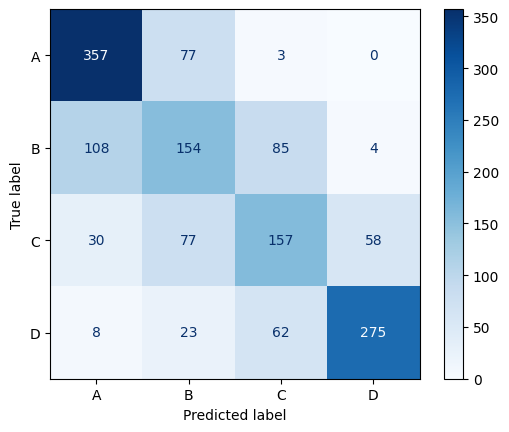

In [65]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap='Blues'
)


In [37]:
print(accuracy_score(y_test, y_pred))

0.6380243572395129


In [60]:
k = range(1, 50)
accuracy_list = []
for item in k:
    clf = KNeighborsClassifier(n_neighbors=item)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append([item, accuracy])
accuracy_list = pd.DataFrame(accuracy_list, columns=["n", "accuracy"])
accuracy_list.sort_values("accuracy", ascending=False)

,n,accuracy
23,24,0.601488
21,22,0.601488
26,27,0.596076
22,23,0.596076
25,26,0.595399
27,28,0.594046
19,20,0.592693
24,25,0.592016
20,21,0.591340
29,30,0.589986
